In many games, especially RPGs, you recieve stat bonuses in the vein of:
* "Increases attack damage by 10%"

Now, the effect is quite clear when there is only one such buff per stat. However, it becomes unclear when there are multiple bonuses affection the same stat.

Here I will do a few examples to show the differences.

In [57]:
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def add_bonuses(base_attack, multiplier_list):
    return base_attack * (1 + sum(x-1 for x in multiplier_list))

def mult_bonuses(base_attack, multiplier_list):
    return base_attack * reduce(lambda x, y: x * y, multiplier_list, 1)

In [58]:
base_attack = 50
multiplier_list = [1.3, 1.7]

In [59]:
add_bonuses(base_attack, multiplier_list)

100.0

In [60]:
mult_bonuses(base_attack, multiplier_list)

110.5

In [61]:
sum(x-1 for x in multiplier_list)

1.0

In [138]:
percent = 1.1
initial_value = 1
num_points = 20

X = list(range(0, num_points + 1))
add_Y = [initial_value * (1 + x * (percent - 1)) for x in X]
mult_Y = [initial_value * (percent ** x) for x in X]

df = pd.DataFrame(data = {
    'X': X,
    'add_Y': add_Y,
    'mult_Y': mult_Y
})

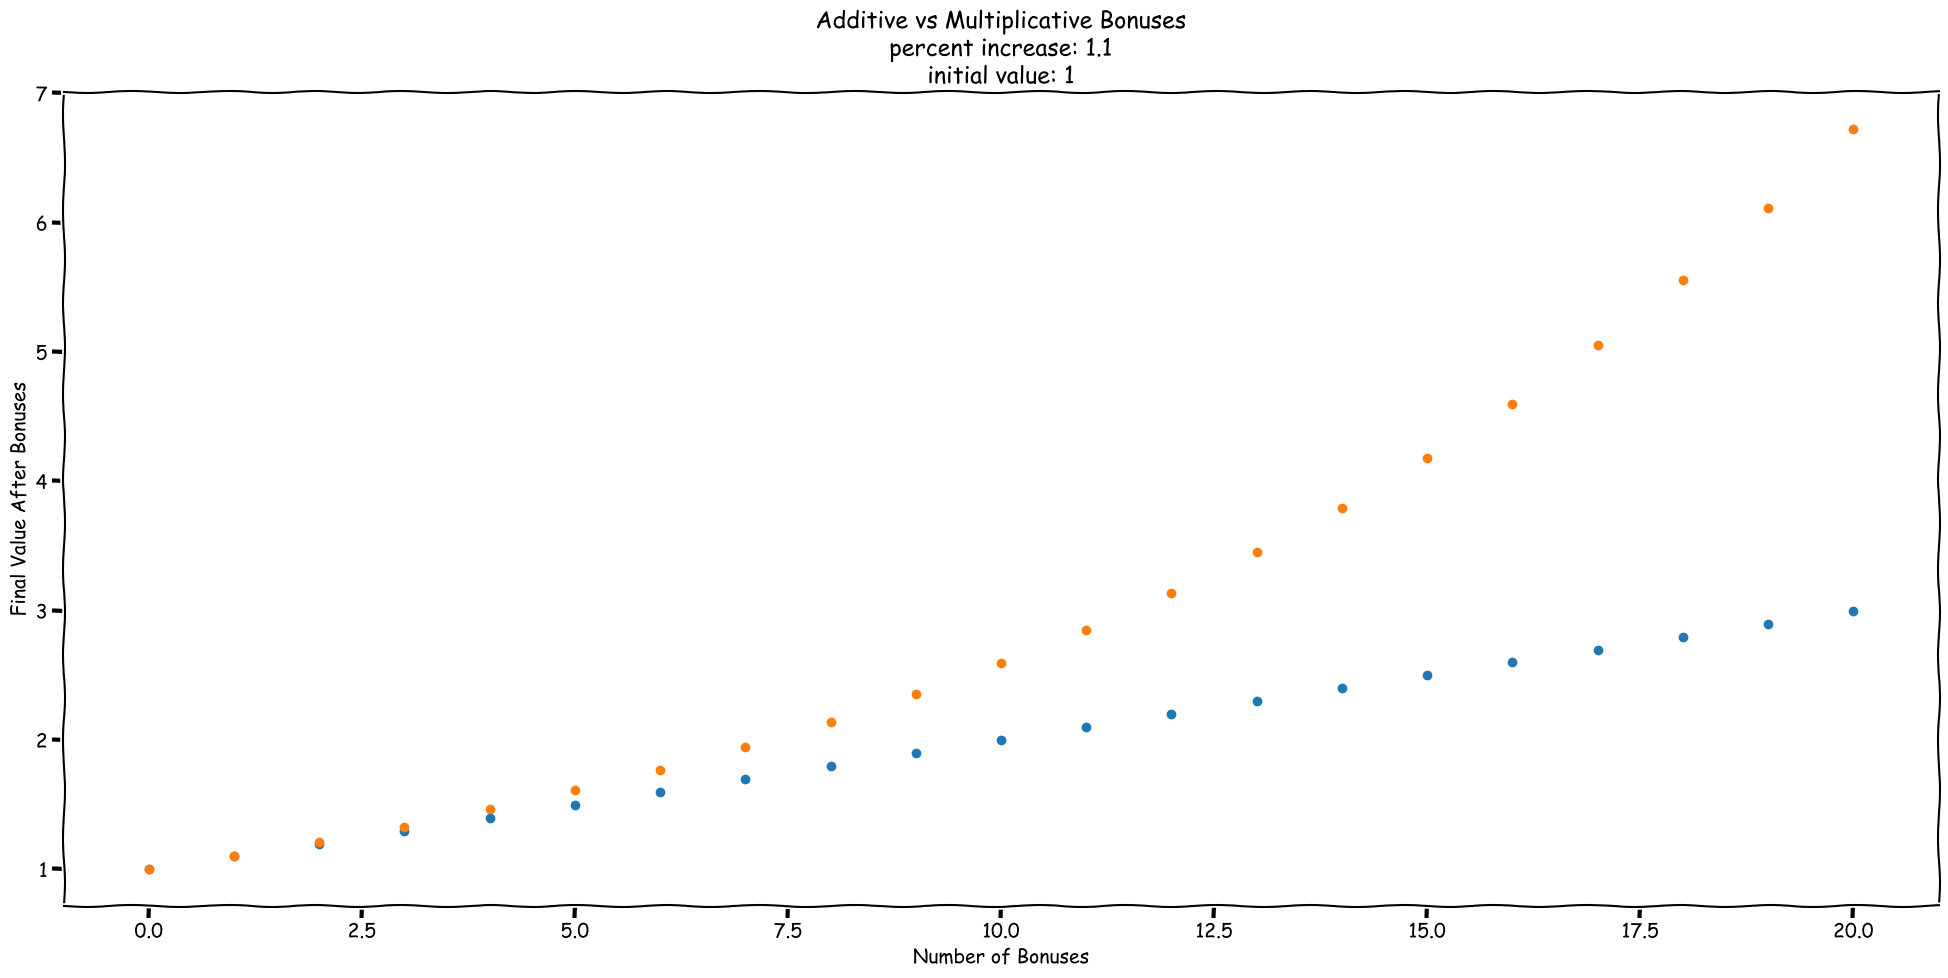

In [139]:
plt.rcdefaults()
plt.xkcd()
plt.figure(figsize=(20,10))
plt.title(f'Additive vs Multiplicative Bonuses\npercent increase: {percent}\ninitial value: {initial_value}')
plt.xlabel('Number of Bonuses')
plt.ylabel('Final Value After Bonuses')
plt.tight_layout()
plt.scatter(x="X", y="add_Y", data=df)
plt.scatter(x="X", y="mult_Y", data=df)
plt.show()